# Computer Vision Course #04
## Train Deep Learning Model Practice
by Can Nguyen - TIC Computer Vision Team


## Introduction
In this practice, you will train your deep learning model for your PoC Practice, in Python using the Keras deep learning library.

After completing this tutorial, you will know:

+ How to load your dataset in Keras.

+ How to add data augmentation method for your dataset in Keras.

+ How to implement and evaluate Convolutional Neural Network with Regularization techniques for your dataset.

Let’s get started.

## Imports

In [2]:
#Import library
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

/home/hung/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Input Pipeline

Keras uses a so-called data-generator for inputting data into the neural network, which will loop over the data for eternity.

We have a small training-set so it helps to artificially inflate its size by making various transformations to the images. We use a built-in data-generator that can make these random transformations. This is also called an augmented dataset.

In [4]:
!ls ./gesture_data

test  train


In [5]:
input_shape = (64,64)
#Enter the path to your dataset
train_dir= './gesture_data/train'
#change "valid" to "test" if your dataset doesn't have "valid" folder
test_dir = './gesture_data/test' 

#---------------------------


"""Data generator for training dataset"""
datagen_train = \
ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    data_format = 'channels_last'
)

We also need a data-generator for the test-set, but this should not do any transformations to the images because we want to know the exact classification accuracy on those specific images. So we just rescale the pixel-values so they are between 0.0 and 1.0

In [6]:
"""Data generator for test dataset"""
datagen_test = \
ImageDataGenerator(
    rescale=1./255,
    data_format= "channels_last"
)

The data-generators will return batches of images.

In [8]:
batch_size = 16

We can save the randomly transformed images during training, so as to inspect whether they have been overly distorted, so we have to adjust the parameters for the data-generator above.

In [9]:
if True:
    save_to_dir = None
else:
    save_to_dir='./gesture_data/augmented_images/'

Now we create the actual data-generator that will read files from disk, resize the images and return a random batch.

It is somewhat awkward that the construction of the data-generator is split into these two steps, but it is probably because there are different kinds of data-generators available for different data-types (images, text, etc.) and sources (memory or disk).

In [10]:
generator_train = \
datagen_train.flow_from_directory(
    directory=train_dir,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=True,
    save_to_dir=save_to_dir
)

generator_test = \
datagen_test.flow_from_directory(
    directory=test_dir,
    target_size=input_shape,
    batch_size=batch_size,
    shuffle=False
)

Found 1080 images belonging to 6 classes.
Found 120 images belonging to 6 classes.


In [13]:
generator_train.image_shape

(64, 64, 3)

Define parameters for training

In [14]:
### Some core parameters for training
num_train = generator_train.n
num_test = generator_test.n
steps_test = num_test//batch_size
steps_per_epoch = num_train // batch_size

Get the class-names for the dataset.

In [15]:
### Re-check our dataset
cls_train = generator_train.classes
cls_test = generator_test.classes
class_names = list(generator_train.class_indices.keys())
print(class_names)
num_classes = generator_train.num_classes
print(num_classes)

['0', '1', '2', '3', '4', '5']
6


## Define your CNN model

In [16]:
# import library
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from IPython.display import Image
from keras.optimizers import Adam

In [39]:
# Create model 
model = Sequential()
# Add convolution 2D shape (5x5x32),padding same, stride=1)
"""Your code here:"""
model.add(
    Conv2D(
        filters=16,
        kernel_size=(7,7),
        padding='same',
        strides=(1, 1),
        activation='relu',
        input_shape=(64,64,3),
        name='CONV_1'    
    )
)

# Add Max_pooling 2D kernel size(2,2),no padding, stride=2
"""Your code here:"""
model.add(
    MaxPooling2D(
        pool_size=(2,2), 
        strides=(2,2), 
        padding='valid', 
        name="MAX_POOL_1"
    )
)

# Add convolution 2D shape (3x3x64),padding same, stride=1 
"""Your code here:"""
model.add(
    Conv2D(
        filters=32,
        kernel_size=(5,5),
        padding='same',
        strides=(1, 1),
        activation='relu',
        name='CONV_2'    
    )
)

# Add Max_pooling 2D kernel size(2,2)
"""Your code here:"""
model.add(
    MaxPooling2D(
        pool_size=(2,2), 
        strides=(2,2), 
        padding='valid', 
        name="MAX_POOL_2"
    )
)

# ADD flatten 
"""Your code here:"""
model.add(
    Flatten(name="FLATTEN")
)

# ADD dense layer 512 hidden unit
"""Your code here:"""
model.add(
    Dense(
        units=512,
        activation='relu',
        name="Dense_1"
    )
)
# ADD dense layer
model.add(
    Dense(
        units=num_classes,
        activation='softmax',
        name="Dense_2"
    )
)


In [40]:
optimizer = Adam(lr=1e-4)

# Compile model
model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizer, 
    metrics=['accuracy']
)

# Summary model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV_1 (Conv2D)              (None, 64, 64, 16)        2368      
_________________________________________________________________
MAX_POOL_1 (MaxPooling2D)    (None, 32, 32, 16)        0         
_________________________________________________________________
CONV_2 (Conv2D)              (None, 32, 32, 32)        12832     
_________________________________________________________________
MAX_POOL_2 (MaxPooling2D)    (None, 16, 16, 32)        0         
_________________________________________________________________
FLATTEN (Flatten)            (None, 8192)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
Dense_2 (Dense)              (None, 6)                 3078      
Total para

## Training

In [41]:
history = \
model.fit_generator(
    generator=generator_train,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=generator_test,
    validation_steps=steps_test
)

Epoch 1/20
67/67 [==============================] - 10s 150ms/step - loss: 1.7498 - acc: 0.2724 - val_loss: 1.6290 - val_acc: 0.3929
Epoch 2/20
67/67 [==============================] - 10s 147ms/step - loss: 1.4270 - acc: 0.4692 - val_loss: 1.2189 - val_acc: 0.6429
Epoch 3/20
67/67 [==============================] - 10s 149ms/step - loss: 1.0731 - acc: 0.6316 - val_loss: 1.0078 - val_acc: 0.6964
Epoch 4/20
67/67 [==============================] - 10s 149ms/step - loss: 0.8863 - acc: 0.7183 - val_loss: 0.8406 - val_acc: 0.7679
Epoch 5/20
67/67 [==============================] - 10s 151ms/step - loss: 0.7507 - acc: 0.7565 - val_loss: 0.8095 - val_acc: 0.7411
Epoch 6/20
67/67 [==============================] - 10s 150ms/step - loss: 0.6860 - acc: 0.7771 - val_loss: 0.7122 - val_acc: 0.7946
Epoch 7/20
67/67 [==============================] - 10s 150ms/step - loss: 0.5851 - acc: 0.8181 - val_loss: 0.7158 - val_acc: 0.7589
Epoch 8/20
67/67 [==============================] - 10s 152ms/step - 

In [42]:
# Final evaluation of the model
scores = model.evaluate_generator(
                  generator_test,
                  verbose=0
               )

print("Accuary score :", scores[1])

Accuary score : 0.8666666666666667


## Show training history as a graph
Keras records the performance metrics at the end of each "epoch" so they can be plotted later. This shows that the loss-value for the training-set generally decreased during training, but the loss-values for the test-set were a bit more erratic. Similarly, the classification accuracy generally improved on the training-set while it was a bit more erratic on the test-set.

In [43]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['acc']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend()

    # Ensure the plot shows correctly.
    plt.show()

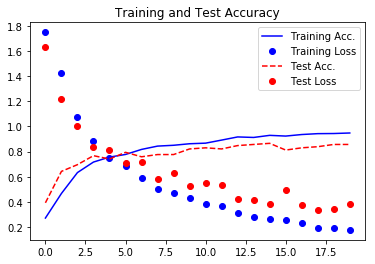

In [44]:
plot_training_history(history)

## Predict image

Create ground-truth for your PoC, that contain the index and class name

Ex:
{0:"Ford", 1:'Lambor', 2: "Range"}

In [45]:
generator_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [46]:
ground_truth = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5'}

In [47]:
import PIL

In [48]:
def predict(image_path, model):
    # Load and resize the image using PIL.
    # Use tensorflow to load image (Work with transparent image like png)
    img = load_img(image_path, target_size=input_shape)
    # print(img)
    # Plot the image.
    plt.imshow(img)
    plt.show()

    img_arr = img_to_array(img)/255.
    img_arr = np.expand_dims(img_arr, axis=0)
    print("Input shape:", img_arr.shape)
    
    pred1 = model.predict(img_arr)
    
    #pred = model.predict_classes(img_array)
    label = np.argmax(pred1,axis=1)
    print("Label:", label)
    print("Prediction - list of [P(0) ... P(5)]:", pred1)
    return ground_truth[label[0]]

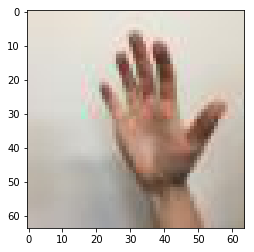

Input shape: (1, 64, 64, 3)
Label: [5]
Prediction - list of [P(0) ... P(5)]: [[7.1405193e-05 3.8482389e-07 1.2159030e-04 2.7170251e-04 1.6929388e-02
  9.8260558e-01]]


'5'

In [49]:
predict(
    image_path=test_dir + '/5/10.jpg',
    model=model
)

In [50]:
pred = model.predict_generator(generator_test)

In [51]:
generator_test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [52]:
pred.argmax(axis=-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 4,
       2, 1, 3, 2, 1, 5, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 5, 5, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 5,
       4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [53]:
compare = generator_test.classes == pred.argmax(axis=-1)

In [54]:
err_idd = []
for i in range(len(compare)):
    if not compare[i]:
        err_idd.append(i)
print(err_idd)

[42, 43, 45, 46, 48, 49, 52, 56, 60, 61, 63, 75, 86, 87, 89, 91]


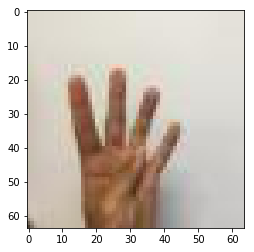

Input shape: (1, 64, 64, 3)
Label: [0]
Prediction - list of [P(0) ... P(5)]: [[3.3635819e-01 1.9814326e-05 3.0954808e-04 1.6016594e-01 2.3438752e-01
  2.6875898e-01]]


'0'

In [56]:
idd = 86
img_path = test_dir + '/' + generator_test.filenames[idd]
predict(
    image_path=img_path,
    model=model
)